In [76]:
# Importing necessary libraries
# General Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# ML library
from sklearn import model_selection
from sklearn import metrics
# Data Balancing Library
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# regression-multiple-methods.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

### Loading Data and Data Summary

In [77]:
algorithms = {
    # 'Logistic-Regression': LogisticRegression(multi_class='auto',random_state=42, max_iter=2000),
    # 'SVC-Linear': SVC(kernel='linear', probability=True,random_state=42),
    # 'SVC-RBF': SVC(kernel='rbf', probability=True,random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    # 'Neural-Network-5': MLPClassifier(hidden_layer_sizes=[5], max_iter=20000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    # 'GradientBoosting': GradientBoostingClassifier(random_state=42),
    # 'KNeighbors': KNeighborsClassifier()
}
file_path = 'features_data_labelled.csv'
np.random.seed(42)
# load the dataset


In [78]:
def trainAndTestWithSampling(X, y, model, model_name):
  # split into train/test sets with same class ratio
  trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42)

  # fit model
  model.fit(trainX, trainy)
  # predict on test set
  y_pred = model.predict(testX)
  # evaluate predictions
  # Accuracy
  print(f'***************************  {model_name}  ********************************')
  print("Accuracy:", accuracy_score(testy, y_pred))
  print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
  print("\nClassification Report:\n", classification_report(testy, y_pred))
  return trainX, testX, trainy, testy

### Sampling techniques

In [89]:
def random_sampling(X, y):
   # Random Under Sampling of Majority class

    df = pd.concat([X, y], axis=1)
    class0 = df[df['y'] == 0]
    class1 = df[df['y'] == 1]
    class2 = df[df['y'] == 2]
    class3 = df[df['y'] == 3]

    class0_under = class0.sample(100)

    df_under = pd.concat([class0_under, class1, class2, class3], axis=0)

    print("Total class of 0, 1, 2, and 3 after Undersampling of majority class: \n",df_under['y'].value_counts())
    trainXu = df_under.drop(columns=['y'])
    trainyu = df_under['y']
    return trainXu, trainyu


In [90]:
# Train and test model

def trainAndTest(X, y, strategy, use_strag, model, type):
  np.random.seed(5)
  # split into train/test sets with same class ratio
  trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

  #Apply sampling technique if any
  if use_strag:
    trainX, trainy = strategy.fit_resample(trainX, trainy)
  # define model
  # model = linear_model.LogisticRegression(solver='liblinear')
  # fit model
  model.fit(trainX, trainy)
  # predict on test set
  yhat = model.predict(testX)
  # evaluate predictions
  acc = metrics.accuracy_score(testy, yhat)
  prec = metrics.precision_score(testy, yhat,
                                           average='micro')
  recall = metrics.recall_score(testy, yhat, 
                                           average='micro')
  f1_score = metrics.f1_score(testy, yhat, 
                                           average='micro')
  classification_report =  metrics.classification_report(testy, yhat)
  print(f'***************************  {type}  Start ********************************')
  # print("Accuracy:", acc)
  print("\nClassification Report:\n", classification_report)
  print(f'***************************  {type}  End ********************************')

  return trainX, trainy, acc, prec, recall, f1_score, classification_report

In [96]:
def technique(X, y, model):

  # summarize class distribution
  print("Original :",Counter(y))

  trainXu, trainyu = random_sampling(X, y)
  print("After Random Under Sampling of Majority class :",Counter(trainyu))
  ### TomekLinks
  # undersample = TomekLinks()

  ### SMOTE
  oversample = SMOTE(sampling_strategy='auto')

  ### SMOTEENN
  # sample = SMOTEENN(sampling_strategy='auto')

  ### Evaluation
  X, y, acc_orig, prec_orig, recall_orig, f1_orig, classification_report = trainAndTest(X, y,False,False, model,'Original Data')
  # X_over, y_over, acc_over, prec_over, recall_over, f1_over, classification_report = trainAndTest(trainXu, trainyu, oversample, True, model, 'SMOTE')
  # X_under, y_under, acc_under, prec_under, recall_under, f1_under,classification_report = trainAndTest(X, y, undersample, True, model, 'TomekLinks')
  X_uo, y_uo, acc_both, prec_both, recall_both, f1_both,classification_report = trainAndTest(trainXu, trainyu, oversample, True, model, 'SMOTE')

  df_result = pd.DataFrame({
    # 'Accuracy': [acc_orig, acc_over, acc_under, acc_both],
    # 'Precision': [prec_orig, prec_over, prec_under, prec_both],
    # 'Recall': [recall_orig, recall_over, recall_under, recall_both],
    # 'F1_score': [f1_orig, f1_over, f1_under, f1_both],
    'classification_report': [classification_report, classification_report, classification_report, classification_report]
  })

  df_result.index = ['Original data', 'SMOTE', 'TomekLinks', 'SMOTEENN']

  ### Plotting

  # fig, ax = plt.subplots(2, 2,figsize=(10,10))
  # --- Plotting (corrected) ---
  # compute unified category list so each subplot uses same x-axis
  cats_orig = y.unique().tolist()
  # cats_over = y_over.unique().tolist()
  # cats_under = y_under.unique().tolist()
  cats_uo = y_uo.unique().tolist()
  categories = sorted(set(cats_orig))

  # get counts reindexed to common categories
  counts_orig = y.value_counts().reindex(categories, fill_value=0)
  # counts_over = y_over.value_counts().reindex(categories, fill_value=0)
  # counts_under = y_under.value_counts().reindex(categories, fill_value=0)
  counts_uo = y_uo.value_counts().reindex(cats_uo, fill_value=0)

  fig, ax = plt.subplots(1, 2, figsize=(10, 10))

  # plot with category labels (ensure x and heights same length)
  ax[0].bar([str(c) for c in categories], counts_orig.values)
  ax[0].set_title("Original Dataset")
  # ax[1].bar([str(c) for c in categories], counts_over.values)
  # ax[1].set_title("SMOTE")

  # # ax[1, 0].bar([str(c) for c in categories], counts_under.values)
  # ax[1, 0].set_title("TomekLinks")

  ax[1].bar([str(c) for c in categories], counts_uo.values)
  ax[1].set_title("SMOTEENN")

  # rotate labels if many categories
  for a in ax.ravel():
      a.set_xticklabels([str(c) for c in categories], rotation=45, ha='right')

  plt.tight_layout()
  plt.show()

  # ax[0, 0].bar(["1","2"], y.value_counts())
  # ax[0, 0].set_title("Original Dataset")
  # ax[0, 1].bar(["1","2"], y_over.value_counts())
  # ax[0, 1].set_title("SMOTE")
  # ax[1, 0].bar(["1","2"], y_under.value_counts())
  # ax[1, 0].set_title("TomekLinks")
  # ax[1, 1].bar(["1","2"], y_uo.value_counts())
  # ax[1, 1].set_title("SMOTEENN")
  # plt.show()

  # fig, ax = plt.subplots(2, 2,figsize=(10,10))

  # ax[0, 0].scatter(X[0], X[2], c = y)
  # ax[0, 0].set_title("Original Dataset")
  # ax[0, 1].scatter(X_over[0], X_over[2], c = y_over)
  # ax[0, 1].set_title("After Oversampling")
  # ax[1, 0].scatter(X_under[0], X_under[2], c = y_under)
  # ax[1, 0].set_title("After Undersampling")
  # ax[1, 1].scatter(X_uo[0], X_uo[2], c = y_uo)
  # ax[1, 1].set_title("After Over and Under sampling")
  # plt.show()

  # fig, ax = plt.subplots(2, 2,figsize=(10,10))

  # ax[0, 0].scatter(X[0], X[1], c = y)
  # ax[0, 0].set_title("Original Dataset")
  # ax[0, 1].scatter(X_over[0], X_over[1], c = y_over)
  # ax[0, 1].set_title("After Oversampling")
  # ax[1, 0].scatter(X_under[0], X_under[1], c = y_under)
  # ax[1, 0].set_title("After Undersampling")
  # ax[1, 1].scatter(X_uo[0], X_uo[1], c = y_uo)
  # ax[1, 1].set_title("After Over and Under sampling")
  
  # plt.show()

  return df_result


##Program Starting Here!

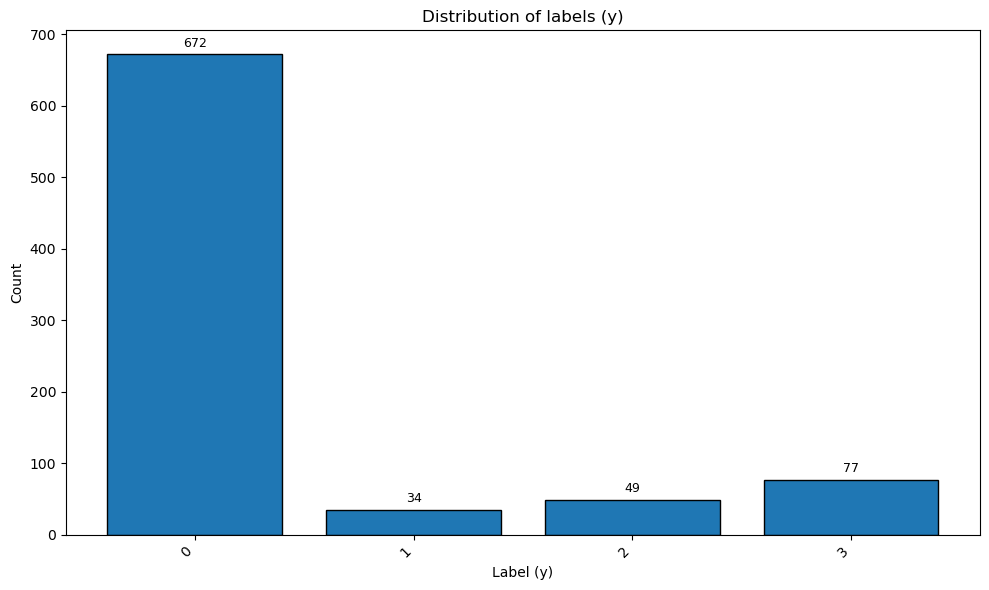

Original : Counter({0: 672, 3: 77, 2: 49, 1: 34})
Total class of 0, 1, 2, and 3 after Undersampling of majority class: 
 y
0    100
3     77
2     49
1     34
Name: count, dtype: int64
After Random Under Sampling of Majority class : Counter({0: 100, 3: 77, 2: 49, 1: 34})


c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***************************  Original Data  Start ********************************

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       135
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        10
           3       1.00      0.13      0.24        15

    accuracy                           0.82       167
   macro avg       0.45      0.28      0.28       167
weighted avg       0.75      0.82      0.75       167

***************************  Original Data  End ********************************
***************************  SMOTE  Start ********************************

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.75      0.43      0.55         7
           2       0.50      0.30      0.38        10
           3       0.52      0.80      0.63        15

    

C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_9156\768051612.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(c) for c in categories], rotation=45, ha='right')
C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_9156\768051612.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(c) for c in categories], rotation=45, ha='right')


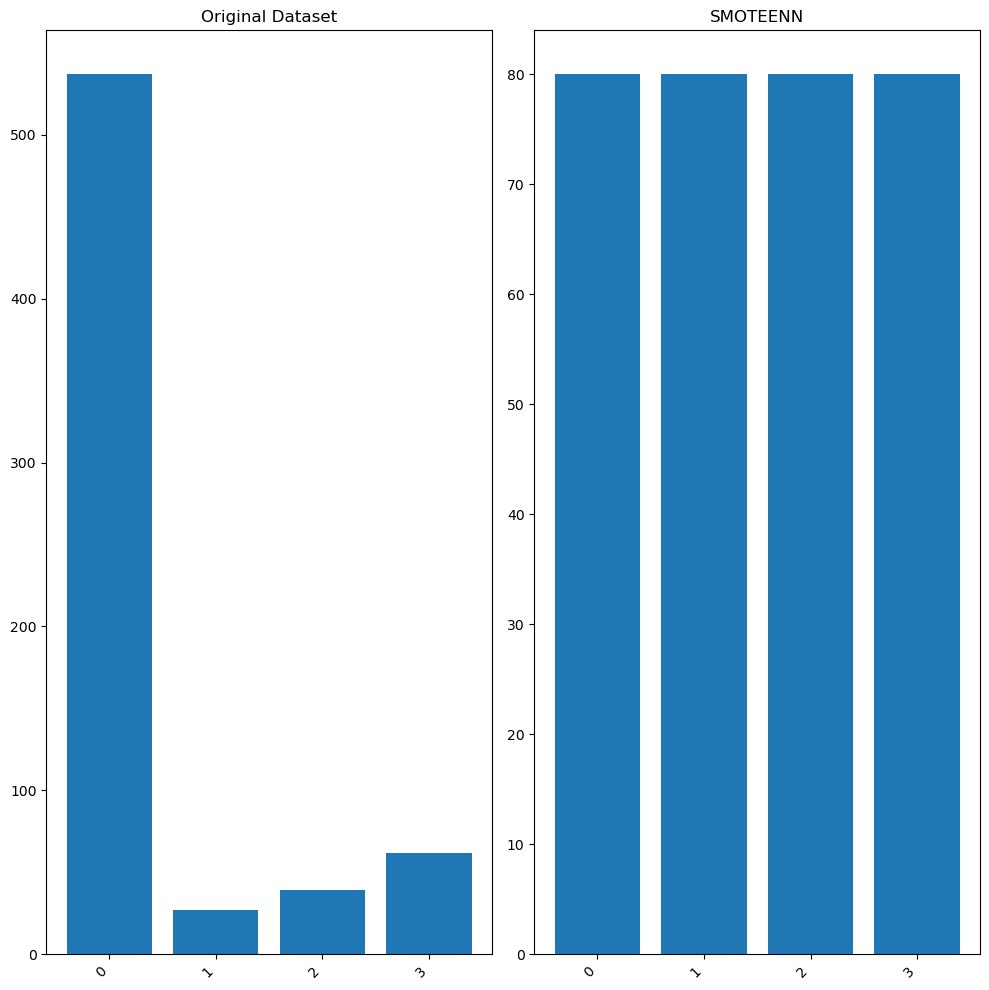

Original : Counter({0: 672, 3: 77, 2: 49, 1: 34})
Total class of 0, 1, 2, and 3 after Undersampling of majority class: 
 y
0    100
3     77
2     49
1     34
Name: count, dtype: int64
After Random Under Sampling of Majority class : Counter({0: 100, 3: 77, 2: 49, 1: 34})
***************************  Original Data  Start ********************************

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       135
           1       0.00      0.00      0.00         7
           2       0.20      0.10      0.13        10
           3       0.32      0.47      0.38        15

    accuracy                           0.77       167
   macro avg       0.35      0.36      0.35       167
weighted avg       0.75      0.77      0.76       167

***************************  Original Data  End ********************************
***************************  SMOTE  Start ********************************

Classification Report:
     

C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_9156\768051612.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(c) for c in categories], rotation=45, ha='right')
C:\Users\SUSHANT\AppData\Local\Temp\ipykernel_9156\768051612.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(c) for c in categories], rotation=45, ha='right')


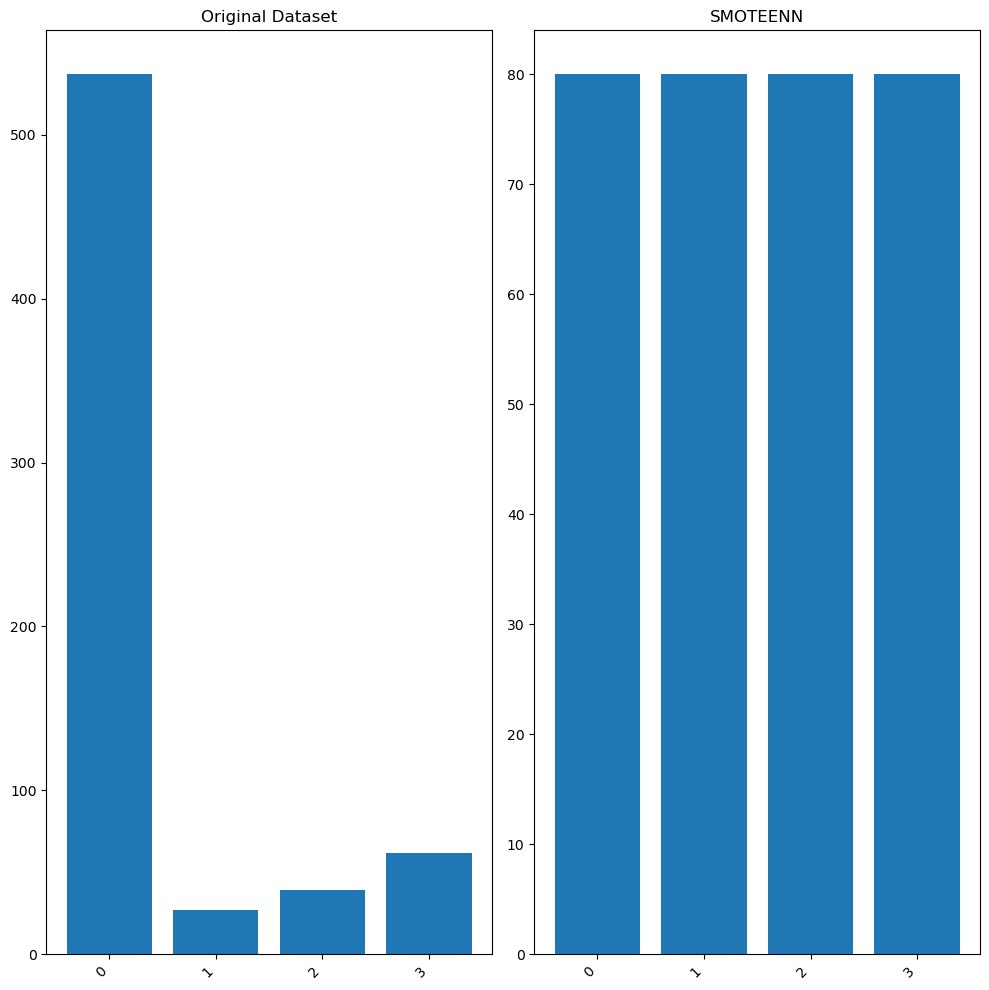

In [97]:
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']

counts = df_clean['y'].value_counts().sort_index()   # or .sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(counts.index.astype(str), counts.values, color='tab:blue', edgecolor='k')
plt.xlabel('Label (y)')
plt.ylabel('Count')
plt.title('Distribution of labels (y)')
plt.xticks(rotation=45, ha='right')

# annotate counts on top of each bar
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + max(counts.values)*0.01, f'{int(h)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

for model_name, algorithm in algorithms.items():
    # trainX, testX, trainy, testy = trainAndTestWithSampling(X,y,algorithm, model_name)
    result = technique(X,y, algorithm)
    # print(f"Algorithm {model_name} Result Comparision \n{result}")
    


## PCA Program Starting Here!

In [98]:

def train_and_evaluate_with_pca(X,y,n_pcs_list):
    # Ensure X only contains the features you want to analyze with PCA

    # --- PCA Process ---
    pca_results = pd.DataFrame(columns=['Model', 'Features', 'classification_report'])
    # Step 1: Standardize the data
    # PCA is affected by scale, so standardization (mean=0, variance=1) is crucial.
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Perform PCA
    # We use all components initially to analyze total variance contribution
    pca = PCA(n_components=None) # None keeps all original dimensions as PCs
    pca.fit(X_scaled)

    # Step 3: Extract explained variance ratios
    # The explained_variance_ratio_ attribute provides the percentage of variance 
    # explained by each individual principal component.
    explained_variance = pca.explained_variance_ratio_

    # --- Plotting the Contributions (Bar Chart) ---
    plt.figure(figsize=(10, 6))
    # Create labels for the X-axis (PC1, PC2, PC3, ...)
    pc_labels = [f"PC{i+1}" for i in range(len(explained_variance))]

    # Plotting the bar chart
    plt.bar(pc_labels, explained_variance * 100, color='skyblue', edgecolor='black')
    # Adding labels and title
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage of Explained Variance (%)')
    plt.title('Contribution of Each Principal Component to Total Variance')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')

    for n_pcs in n_pcs_list:
        pca_n = PCA()
        X_pca = pca_n.fit_transform(X_scaled)
        X_pca_subset = X_pca[:, :n_pcs]  # Select the first `n_pcs` PCs
        print(f"\nUsing top {n_pcs} principal components:")
        print(f"Original dimensions: {X_scaled.shape[1]}")
        print(f"Reduced dimensions: {X_pca_subset.shape[1]}")
        np.random.seed(5)
        # split into train/test sets with same class ratio
        trainX, testX, trainy, testy = model_selection.train_test_split(X_pca_subset, y, test_size=0.2,random_state=42)

        for model_name, model in algorithms.items():
            # Train the model
            model.fit(trainX, trainy)
            y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
            print("Accuracy:", accuracy_score(testy, y_pred))
            print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
            print("\nClassification Report:\n", classification_report(testy, y_pred))
            # Store results
            pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
     # Train and evaluate models using original features
    trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    for model_name, model in algorithms.items():
        model.fit(trainX, trainy)

        y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
        print("Accuracy:", accuracy_score(testy, y_pred))
        print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
        print("\nClassification Report:\n", classification_report(testy, y_pred))

        # Store results
        pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
    return pca_results
    


Using top 3 principal components:
Original dimensions: 3290
Reduced dimensions: 3
Accuracy: 0.7904191616766467

Confusion Metrics
 [[131   1   0   3]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 12   0   0   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.25      0.08      0.12        13

    accuracy                           0.79       167
   macro avg       0.26      0.26      0.25       167
weighted avg       0.67      0.79      0.72       167

Accuracy: 0.688622754491018

Confusion Metrics
 [[111   4   7  13]
 [  4   0   1   0]
 [ 11   2   1   0]
 [ 10   0   0   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       135
           1       0.00      0.00      0.00         5
           2      

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\sit


Using top 5 principal components:
Original dimensions: 3290
Reduced dimensions: 5
Accuracy: 0.8203592814371258

Confusion Metrics
 [[133   0   1   1]
 [  4   0   0   1]
 [ 14   0   0   0]
 [  9   0   0   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.67      0.31      0.42        13

    accuracy                           0.82       167
   macro avg       0.37      0.32      0.33       167
weighted avg       0.72      0.82      0.76       167

Accuracy: 0.6946107784431138

Confusion Metrics
 [[114   5   4  12]
 [  4   0   0   1]
 [ 13   1   0   0]
 [  6   3   2   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       135
           1       0.00      0.00      0.00         5
           2     

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\sit


Using top 10 principal components:
Original dimensions: 3290
Reduced dimensions: 10
Accuracy: 0.8383233532934131

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [  8   0   0   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       1.00      0.38      0.56        13

    accuracy                           0.84       167
   macro avg       0.46      0.35      0.37       167
weighted avg       0.75      0.84      0.78       167

Accuracy: 0.7365269461077845

Confusion Metrics
 [[116   3   6  10]
 [  3   1   1   0]
 [  9   2   1   2]
 [  7   1   0   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       135
           1       0.14      0.20      0.17         5
           2   

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\sit


Using top 15 principal components:
Original dimensions: 3290
Reduced dimensions: 15
Accuracy: 0.8143712574850299

Confusion Metrics
 [[134   0   0   1]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 11   0   0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.67      0.15      0.25        13

    accuracy                           0.81       167
   macro avg       0.37      0.29      0.29       167
weighted avg       0.71      0.81      0.74       167

Accuracy: 0.6946107784431138

Confusion Metrics
 [[109   5   6  15]
 [  3   0   1   1]
 [ 12   0   1   1]
 [  5   1   1   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       135
           1       0.00      0.00      0.00         5
           2   

c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\sit

Accuracy: 0.8203592814371258

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 11   0   0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       1.00      0.15      0.27        13

    accuracy                           0.82       167
   macro avg       0.45      0.29      0.29       167
weighted avg       0.74      0.82      0.75       167



c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SUSHANT\anaconda3\Lib\sit

Accuracy: 0.6946107784431138

Confusion Metrics
 [[113   8   5   9]
 [  2   0   0   3]
 [  8   1   1   4]
 [  7   4   0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       135
           1       0.00      0.00      0.00         5
           2       0.17      0.07      0.10        14
           3       0.11      0.15      0.13        13

    accuracy                           0.69       167
   macro avg       0.29      0.27      0.27       167
weighted avg       0.73      0.69      0.71       167

          Model Features                              classification_report
0  RandomForest    3 PCs                precision    recall  f1-score   ...
1  DecisionTree    3 PCs                precision    recall  f1-score   ...
2  RandomForest    5 PCs                precision    recall  f1-score   ...
3  DecisionTree    5 PCs                precision    recall  f1-score   ...
4  RandomForest   10 PCs          

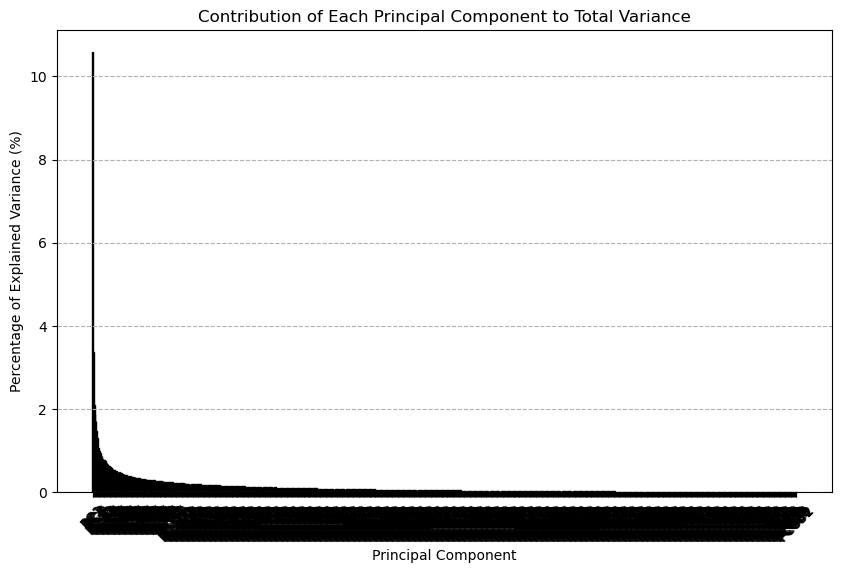

In [99]:
n_pcs_list = [3, 5, 10, 15]
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']
pca_results = train_and_evaluate_with_pca(X,y, n_pcs_list)
print(pca_results)
print("----------------------------------------------------------------\n\n")